<p><a href="https://colab.research.google.com/github/gdsaxton/GDAN5400/blob/main/Week%203%20Notebooks/GDAN%205400%20-%20Week%203%20Class%20Notebook.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></p>

# Notes
- Add Quizzes (e.g., PollEV)
  - Upload *GDAN 5400 - Coding Assignment 1 Solutions.ipynb* from MacBook to GitHub

# Week 3: Data Wrangling and Transformation in Pandas

## **Learning Objectives**
By the end of this session, students will:
1. Write and apply custom functions to transform data.
2. Understand how to create new variables in a pandas DataFrame.
3. Understand the different levels of measurement.
4. Perform data type conversions in pandas.

  
---

# **Lesson Plan**

- Today's Plan:
  - Functions
    - Built-in functions
    - Custom user-defined functions
  - Creating new variables
  - Levels of measurement 
     - Nominal, ordinal, interval, ratio
     - Discrete vs. continuous variables
     - Binary variables
  - Converting data types

## **Dataset**
We will use the following accounting-specific dataset, created for this session. This dataset simulates financial transactions for 20 clients. It includes details like transaction amounts, client industries, invoice status, and payment delays.

In [136]:
import pandas as pd

# Create test dataset
data = {
    'Client_ID': range(1, 21),
    'Industry': ['Retail', 'Manufacturing', 'Tech', 'Finance'] * 5,
    'Transaction_Amount': [1500, 2000, 3500, 4000, 4500, 800, 1200, 3000, 700, 2200,
                           1800, 2500, 4000, 3700, 3200, 500, 2100, 2900, 3600, 3300],
    'Invoice_Status': ['Paid', 'Unpaid', 'Paid', 'Unpaid', 'Paid'] * 4,
    'Payment_Delay_Days': [0, 15, 0, 30, 0, 45, 60, 0, 10, 0, 20, 0, 5, 25, 0, 35, 50, 0, 40, 0],
    'Zip_Code': [10001, 10002, 10003, 10004, 10005] * 4,
    'Region': ['North', 'East', 'West', 'South', 'Central'] * 4,
    'Currency': ['USD'] * 20,
    'Transaction_Date': pd.date_range(start='2023-01-01', periods=20).astype(str),
    'Tax_Percentage': [5, 8, 10, 7, 6, 4, 5, 9, 6, 7, 5, 10, 8, 7, 6, 9, 4, 7, 5, 6]
}
# I am converting `Transaction_Date` to `str` format in the following code block so that we can convert it to `datetime`

df = pd.DataFrame(data)
df

,Client_ID,Industry,Transaction_Amount,Invoice_Status,Payment_Delay_Days,Zip_Code,Region,Currency,Transaction_Date,Tax_Percentage
0,1,Retail,1500,Paid,0,10001,North,USD,2023-01-01,5
1,2,Manufacturing,2000,Unpaid,15,10002,East,USD,2023-01-02,8
2,3,Tech,3500,Paid,0,10003,West,USD,2023-01-03,10
3,4,Finance,4000,Unpaid,30,10004,South,USD,2023-01-04,7
4,5,Retail,4500,Paid,0,10005,Central,USD,2023-01-05,6
5,6,Manufacturing,800,Paid,45,10001,North,USD,2023-01-06,4
6,7,Tech,1200,Unpaid,60,10002,East,USD,2023-01-07,5
7,8,Finance,3000,Paid,0,10003,West,USD,2023-01-08,9
8,9,Retail,700,Unpaid,10,10004,South,USD,2023-01-09,6
9,10,Manufacturing,2200,Paid,0,10005,Central,USD,2023-01-10,7


# Python Functions 

# Commonly Used Built-in Functions in Python

Python has a variety of built-in functions that simplify coding and data analysis tasks. 

- **Definition**: Built-in functions are pre-defined functions in Python that perform specific operations.
- **Why Use Them?**
  - Save time and effort by leveraging pre-coded functionality.
  - Increase readability and efficiency in your code.

Here’s a categorized list of the most important ones:

---

## **1. Data Type Conversion**

- **`int()`** – Converts a value to an integer.

- **`float()`** – Converts a value to a floating-point number.

- **`str()`** – Converts a value to a string.

- **`bool()`** – Converts a value to a boolean (`True` or False).

- **`list()`, tuple(), set(), dict()** – Convert values into these respective data types.

---

## **2. Input and Output**

- **`print()`** – Prints output to the console.

- **`input()`** – Accepts user input as a string.

---

## **3. Math and Numeric Operations**

- **`abs()`** – Returns the absolute value of a number.

- **`round()`** – Rounds a number to the nearest integer or specified number of decimal places.

- **`pow()`** – Returns the value of a number raised to a power.

- **`sum()`** – Sums the elements of an iterable (e.g., a list).

- **`min()`, max()** – Return the minimum or maximum value from an iterable.

---

## **4. Iterables and Collections**

- **`len()`** – Returns the number of items in an iterable.

- **`sorted()`** – Returns a sorted list from the elements of an iterable.

- **`reversed()`** – Returns a reversed iterator of a sequence.

- **`enumerate()`** – Returns an iterator that produces pairs of index and value for an iterable.

- **`zip()`** – Combines multiple iterables into tuples.

---

## **5. Functional Programming**

- **`map()`** – Applies a function to all items in an iterable.

- **`filter()`** – Filters elements of an iterable based on a function.

- **`reduce()`** – Reduces an iterable to a single value using a function (requires functools).

- **`lambda`** – Not a function but used to create anonymous functions for one-time use.

---

## **6. Logical and Comparison**

- **`all()`** – Returns True if all elements in an iterable are True.

- **`any()`** – Returns True if at least one element in an iterable is True.

---

## **7. Object Introspection**

- **`type()`** – Returns the type of an object.

- **`dir()`** – Lists the attributes and methods of an object.

- **`id()`** – Returns the unique ID of an object.

- **`help()`** – Displays help information about a function or object.

- **`isinstance()`** – Checks if an object is an instance of a specific class or type.

---

## **8. File Handling**

- **`open()`** – Opens a file for reading, writing, or appending.

- **`read()`, write(), close()** – Methods for file manipulation.

---

## **9. Error Handling**

- **`eval()`** – Evaluates a string as a Python expression (use cautiously for security).

- **`exec()`** – Executes a string as Python code.

---

## **10. Miscellaneous**

- **`range()`** – Returns a sequence of numbers, often used in loops.

- **`chr()`** – Converts an integer to its corresponding Unicode character.

- **`ord()`** – Converts a character to its corresponding Unicode integer.

- **`hash()`** – Returns the hash value of an object.

- **`bin()`, oct(), hex()** – Convert an integer to binary, octal, or hexadecimal format.

---




# Examples

We will go over the first three categories – the three most common – in class. The code for the other categories is provided if you want to play around with them.

### Category 1: Data Type Conversion Examples
**Purpose**: Convert values between data types.

**General Python Examples**
1. Converting a Float to an Integer

In [65]:
value = 3.14
converted_value = int(value)
print(f"Converted Value: {converted_value}, Type: {type(converted_value)}")

Converted Value: 3, Type: <class 'int'>


2. Converting a Float to a String

In [68]:
pi = 3.14159
string_pi = str(pi)
print(f"String Value: {string_pi}, Type: {type(string_pi)}")

String Value: 3.14159, Type: <class 'str'>


**Dataframe Example**
1. Convert the `Transaction_Date` column to datetime format

In [141]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
print(df[['Transaction_Date']].dtypes)
# Output: Transaction_Date    datetime64[ns]

Transaction_Date    datetime64[ns]
dtype: object


### Category 2: Input and Output

`print()` is essential for displaying information and debugging code.

`input()` allows user interaction, useful for dynamic scripts.
Printing specific rows or columns of a DataFrame helps with exploratory data analysis.

**General Python Examples**

Printing Output to the Console

In [69]:
message = "Hello, Python!"
print(message)

Hello, Python!


In [70]:
name = input("Enter your name: ")
print(f"Hello, {name}!")

Enter your name: Greg
Hello, Greg!


In [71]:
age = input("Enter your age: ")
print(f"You will be {int(age) + 10} years old in 10 years")

Enter your age: 56
You will be 66 years old in 10 years


**Dataframe Examples**

In [72]:
print(f"Total transactions: ${df['Transaction_Amount'].sum():,.2f}")
print(f"Number of unpaid invoices: {len(df[df['Invoice_Status'] == 'Unpaid'])}")

Total transactions: $51,000.00
Number of unpaid invoices: 8


### Category 3:  Math and Numeric Operations
Using `abs()`, `round()`, `pow()`, `sum()`, `min()`, `max()`

**General Python Examples**

In [75]:
numbers = [-5, 3.14159, 2, 8, -10]
print(abs(numbers[0]))  # 5
print(round(numbers[1], 2))  # 3.14
print(pow(2, 3))  # 8
print(sum(numbers))  # -1.85841
print(min(numbers))  # -10
print(max(numbers))  # 8

5
3.14
8
-1.8584099999999992
-10
8


**Dataframe Examples**  
Dataset examples using numerical operations`

In [76]:
print(f"Average transaction: ${round(df['Transaction_Amount'].mean(), 2)}")
print(f"Range of payment delays: {max(df['Payment_Delay_Days']) - min(df['Payment_Delay_Days'])} days")
print(f"Total revenue: ${sum(df['Transaction_Amount']):,.2f}")
print(f"Smallest payment delay: {min(df['Payment_Delay_Days'])} days")
print(f"Largest payment delay: {max(df['Payment_Delay_Days'])} days")
print(f"Absolute difference in tax rates: {abs(max(df['Tax_Percentage']) - min(df['Tax_Percentage']))}%")

Average transaction: $2550.0
Range of payment delays: 60 days
Total revenue: $51,000.00
Smallest payment delay: 0 days
Largest payment delay: 60 days
Absolute difference in tax rates: 6%


### Category 4: Iterables and Collections

Examples using `len()`, `sorted()`, `reversed()`, `enumerate()`, `zip()`

**General Python Examples**
```python
items = ['invoice', 'payment', 'refund']
print(len(items))  # 3
print(items)  #  ['invoice', 'payment', 'refund', ]
print(sorted(items))  # ['invoice', 'payment', 'refund']
print(list(reversed(items)))  # ['refund', 'payment', 'invoice']
print(list(enumerate(items)))  # [(0, 'invoice'), (1, 'payment'), (2, 'refund')]
combined = list(zip(items, [1, 2, 3]))  # [('invoice', 1), ('payment', 2), ('refund', 3)]
print(combined)

nums = [4, 2, 1, 3]
print(len(nums))  # 4
print(sorted(nums))  # [1, 2, 3, 4]
print(list(enumerate(nums)))  # [(0, 4), (1, 2), (2, 1), (3, 3)]
```

**Dataframe Examples**
```python
print(f"Total records: {len(df)}")
print(f"Sorted amounts: {sorted(df['Transaction_Amount'])[:5]}")  # First 5
for i, (amount, status) in enumerate(zip(df['Transaction_Amount'], df['Invoice_Status'])):
   print(f"Transaction {i+1}: ${amount} - {status}")
for idx, amount in enumerate(sorted(df['Transaction_Amount'])):
   print(f"Transaction {idx+1}: ${amount}")   
```

### Category 5: Functional Programming

Examples using `map()`, `filter()`, `lambda`

**General Python Examples**
```python
numbers = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, numbers))  # [1, 4, 9, 16, 25]
evens = list(filter(lambda x: x % 2 == 0, numbers))  # [2, 4]
from functools import reduce
sum_all = reduce(lambda x, y: x + y, numbers)
doubled = list(map(lambda x: x * 2, numbers))
```

**Dataframe Examples**
```python
high_transactions = list(filter(lambda x: x > 3000, df['Transaction_Amount']))
tax_rates = list(map(lambda x: x/100, df['Tax_Percentage']))
late_payments = list(filter(lambda x: x > 0, df['Payment_Delay_Days']))
tax_amounts = list(map(lambda x, y: x * (y/100), df['Transaction_Amount'], df['Tax_Percentage']))
tax_multiplier = list(map(lambda x: x/100, df['Tax_Percentage']))
```

### Category 6: Logical and Comparison

**General Python Examples**
```python
values = [True, True, False]
print(all(values))  # False
print(any(values))  # True
numbers = [1, 2, 3, 4, 5]
print(all(x > 0 for x in numbers))  # True
print(any(x > 4 for x in numbers))  # True

numbers = [2, 4, 6, 8]
all_even = all(num % 2 == 0 for num in numbers)  # True
any_over_five = any(num > 5 for num in numbers)  # True
```

**Dataframe Examples**
```python
all_paid = all(status == 'Paid' for status in df['Invoice_Status'])
any_large = any(amount > 5000 for amount in df['Transaction_Amount'])
all_usd = all(currency == 'USD' for currency in df['Currency'])
any_late = any(delay > 30 for delay in df['Payment_Delay_Days'])
```

### Category 7: Object Introspection

Examples using `type()`, `dir()`, `id()`, `help()`, `isinstance()`

**General Python Examples**
```python
x = 42
print(type(x))  # <class 'int'>
print(isinstance(x, int))  # True
print(dir(x))  # Shows all attributes and methods
help(x)  # Shows documentation
print(id(x))  # Shows unique identifier
```

**Dataframe Examples**
```python
print(type(df['Transaction_Amount']))  # pandas.Series
print(isinstance(df, pd.DataFrame))  # True
print(dir(df))  # Shows DataFrame methods
print(df.dtypes)  # Shows data types of columns
```

### Category 8: File Handling

**General Python Examples**
```python
with open('report.txt', 'w') as f:
   f.write('Financial Report')

with open('report.txt', 'r') as f:
   content = f.read()
   
with open('data.txt', 'a') as f:
   f.write('\nAppending new data')
```

**Dataframe Examples**
```python
df.to_csv('transactions.csv', index=False)
df_new = pd.read_csv('transactions.csv')
df.to_excel('financial_report.xlsx', sheet_name='Transactions')
df_subset = pd.read_excel('financial_report.xlsx', sheet_name='Transactions')
```

### Category 9: Error Handling

**General Python Examples**
```python
x = 1
y = 2
result = eval('x + y')  # 3
expression = "max([1, 2, 3])"
print(eval(expression))  # 3

code = "for i in range(3): print(i)"
exec(code)
```

**Dataframe Examples**
```python
try:
   result = eval("df['Transaction_Amount'].mean()")
   print(f"Average amount: ${result:,.2f}")
except Exception as e:
   print(f"Error: {e}")

try:
   exec("df['Tax_Total'] = df['Transaction_Amount'] * df['Tax_Percentage'] / 100")
except Exception as e:
   print(f"Error: {e}")
```

### Category 10: Miscellaneous

Examples using `range()`, `chr()`, `ord()`, `hash()`, `bin()`, `oct()`, `hex()`

The `hash()` function returns the hash value of an object. In Python, a `hash`` is a unique integer value generated by a hash function for a given input. Hashes are commonly used in data structures like dictionaries and sets to quickly compare keys and store/retrieve data efficiently.

In computing, a `hash` is a fixed-size numerical or alphanumeric value generated from input data of arbitrary size using a mathematical algorithm known as a hash function. This process, called hashing, transforms the input into a unique representation, often referred to as a hash code, hash value, or digest. Hashing is a fundamental technique in computer science and cybersecurity, providing a means to uniquely represent data, verify its integrity, and facilitate efficient data management

**General Python Examples**
```python
for i in range(3):  # 0,1,2
   print(chr(65 + i))  # ABC
print(ord('A'))  # 65
print(bin(10))  # 0b1010
print(hex(255))  # 0xff
print(hash('invoice'))  # hash value
```

The built-in `hash()` function returns the hash value of an object
```python
for id in range(len(df)):
   print(f"Hash of Client {df.loc[id, 'Client_ID']}: {hash(df.loc[id, 'Client_ID'])}")
print(f"Binary representation of max amount: {bin(int(df['Transaction_Amount'].max()))}")
```

**Dataframe Examples**
```python
for id in range(len(df)):
   print(f"Client {df.loc[id, 'Client_ID']}")
print(f"Binary of max amount: {bin(int(df['Transaction_Amount'].max()))}")
print(f"Hex of client count: {hex(len(df))}")
```

### Example using `range` – Run helper script to get code for remaining years
Script to read a CSV file, skipping the first row and using the second row as column names

In [133]:
for year in range(2011, 2021):
    print(f"""
file_path = 'R13792447_SL050.csv'  # Replace with your file path
df{year} = pd.read_csv(file_path, skiprows=1)
df{year}['year'] = {year}
print('# of columns:', len(df{year}.columns))
print('# of observations:', len(df{year}))
df{year}[:2]
    """)


file_path = 'R13792447_SL050.csv'  # Replace with your file path
df2011 = pd.read_csv(file_path, skiprows=1)
df2011['year'] = 2011
print('# of columns:', len(df2011.columns))
print('# of observations:', len(df2011))
df2011[:2]
    

file_path = 'R13792447_SL050.csv'  # Replace with your file path
df2012 = pd.read_csv(file_path, skiprows=1)
df2012['year'] = 2012
print('# of columns:', len(df2012.columns))
print('# of observations:', len(df2012))
df2012[:2]
    

file_path = 'R13792447_SL050.csv'  # Replace with your file path
df2013 = pd.read_csv(file_path, skiprows=1)
df2013['year'] = 2013
print('# of columns:', len(df2013.columns))
print('# of observations:', len(df2013))
df2013[:2]
    

file_path = 'R13792447_SL050.csv'  # Replace with your file path
df2014 = pd.read_csv(file_path, skiprows=1)
df2014['year'] = 2014
print('# of columns:', len(df2014.columns))
print('# of observations:', len(df2014))
df2014[:2]
    

file_path = 'R13792447_SL050.csv'  # Replace with your file path
df

# Custom Functions in Python
## What are they?
- Reusable blocks of code defined using `def` keyword
- Take inputs (parameters), perform operations, return outputs
- Follow DRY principle (Don't Repeat Yourself)
- Enable modular, organized, and maintainable code
- Can be called multiple times with different inputs

-------------------

# Custom Functions
**General Python Examples**

In [129]:
def has_vowels(text):
   """Returns True if string contains vowels"""
   return any(char in 'aeiouAEIOU' for char in text)

In [84]:
print(has_vowels('Python')) 

True


In [85]:
# Basic function to square a number and add a constant
def square_plus(x, constant=1):
   """Takes a number, squares it and adds a constant (default 1)"""
   return x**2 + constant

In [86]:
print(square_plus(3))
print(square_plus(3, 2))

10
11


In [89]:
def calculate_depreciation(cost, salvage, years):
   """Calculate straight-line depreciation"""
   return (cost - salvage) / years

In [93]:
calculate_depreciation(50000, 5000, 5)

9000.0

In [94]:
# Example 1: Straight-line depreciation for a machine
machine_cost = 50000
salvage_value = 5000
useful_life = 5
annual_depreciation = calculate_depreciation(machine_cost, salvage_value, useful_life)
print(f"Annual depreciation: ${annual_depreciation:,.2f}")  # $9,000.00

Annual depreciation: $9,000.00


In [ ]:
def gross_margin(revenue, cogs):
   """Calculate gross margin percentage"""
   return ((revenue - cogs) / revenue) * 100

In [95]:
# Example 3: Gross margin calculation
revenue = 100000
cost_of_goods = 60000
margin = gross_margin(revenue, cost_of_goods)
print(f"Gross margin: {margin:.1f}%") 

Gross margin: 40.0%


In [97]:
def debt_ratio(total_liabilities, total_assets):
   """Calculate debt ratio"""
   return total_liabilities / total_assets

In [98]:
# Calculate debt ratio
print(debt_ratio(500000, 1000000))  

0.5


In [99]:
def working_capital(current_assets, current_liabilities):
   """Calculate working capital"""
   return current_assets - current_liabilities

In [100]:
# Calculate working capital
print(working_capital(250000, 150000))  

100000


In [101]:
def roi(net_profit, investment):
   """Calculate return on investment percentage"""
   return (net_profit / investment) * 100

In [102]:
# Calculate ROI
print(f"{roi(50000, 200000):.1f}%") 

25.0%


In [103]:
def interest_payment(principal, annual_rate, days):
   """Calculate interest for partial year
   Using actual/365 day method"""
   return principal * (annual_rate / 365) * days

In [104]:
# Calculate interest for 90 days
print(interest_payment(100000, 0.06, 90)) 

1479.4520547945208


In [144]:
df[:1]

,Client_ID,Industry,Transaction_Amount,Invoice_Status,Payment_Delay_Days,Zip_Code,Region,Currency,Transaction_Date,Tax_Percentage
0,1,Retail,1500,Paid,0,10001,North,USD,2023-01-01,5


#### Dataframe Examples

Function to calculate tax percentage as low, medium, or high

In [145]:
def categorize_tax_percentage(tax):
    if tax < 6:
        return 'Low'
    elif tax <= 8:
        return 'Medium'
    else:
        return 'High'

<br>Apply function to dataframe column without assigning output to a variable

In [146]:
df['Tax_Percentage'].apply(categorize_tax_percentage)

0        Low
1     Medium
2       High
3     Medium
4     Medium
5        Low
6        Low
7       High
8     Medium
9     Medium
10       Low
11      High
12    Medium
13    Medium
14    Medium
15      High
16       Low
17    Medium
18       Low
19    Medium
Name: Tax_Percentage, dtype: object

<br>Apply function to dataframe column and assign output to a new `global` (non-dataframe) variable. In PANDAS, this is also considered a `Series`.

In [114]:
tax_percentages = df['Tax_Percentage'].apply(categorize_tax_percentage)
tax_percentages

0        Low
1     Medium
2       High
3     Medium
4     Medium
5        Low
6        Low
7       High
8     Medium
9     Medium
10       Low
11      High
12    Medium
13    Medium
14    Medium
15      High
16       Low
17    Medium
18       Low
19    Medium
Name: Tax_Percentage, dtype: object

<br>Apply function to dataframe column and assign output to a new dataframe column

In [115]:
df['Tax_Category'] = df['Tax_Percentage'].apply(categorize_tax_percentage)
df[['Tax_Percentage', 'Tax_Category']]

,Tax_Percentage,Tax_Category
0,5,Low
1,8,Medium
2,10,High
3,7,Medium
4,6,Medium
5,4,Low
6,5,Low
7,9,High
8,6,Medium
9,7,Medium


In [ ]:
def amount_category(amount):
   """Returns size category based on transaction amount"""
   if amount < 1000: return 'Small'
   elif amount < 3000: return 'Medium'
   else: return 'Large'

In [130]:
df['Size_Category'] = df['Transaction_Amount'].apply(amount_category)      
df[['Transaction_Amount', 'Size_Category']] 

,Transaction_Amount,Size_Category
0,1500,Medium
1,2000,Medium
2,3500,Large
3,4000,Large
4,4500,Large
5,800,Small
6,1200,Medium
7,3000,Large
8,700,Small
9,2200,Medium


### Small-Group Activity [10 minutes]
- Write a custom function to check if the `Transaction_Amount` exceeds $3,000 and apply it directly to print the results. Have the output be 'Yes' or 'No'
  - Call the function `is_large_transaction` and save the output as a `global variable` called `large_transaction_check`
- Write a custom function to classify `Transaction_Amount` as `Small`, `Medium`, or `Large`.
  - Call the function `categorize_transaction_amt` and save the output as a `dataframe column` called `Transaction_Category`

In [107]:
#Result: Prdefints "Yes" or "No" for each row based on whether the transaction amount is > $3,000.
def is_large_transaction

In [109]:
#Apply the function directly
large_transaction_check = 

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6      No
7      No
8      No
9      No
10     No
11     No
12    Yes
13    Yes
14    Yes
15     No
16     No
17     No
18    Yes
19    Yes
Name: Transaction_Amount, dtype: object

# 2. Creating New Variables 

#### Modifying column values to create a new variable 
Basic syntax for creating a new column from an existing column:
```python
df['new_column'] = df['existing_column'] * 2
```

#### Using apply for custom transformations -- either a formal/named function or a `lambda` function
```python
df['new_column'] = df['existing_column'].apply(lambda x: x * 2 if x > 10 else x)
```

**Dataframe Examples**  
Add a new column for the tax amount:

In [125]:
df['Tax_Amount'] = (df['Transaction_Amount'] * df['Tax_Percentage']) / 100
df[['Transaction_Amount', 'Tax_Percentage', 'Tax_Amount']]

,Transaction_Amount,Tax_Percentage,Tax_Amount
0,1500,5,75.0
1,2000,8,160.0
2,3500,10,350.0
3,4000,7,280.0
4,4500,6,270.0
5,800,4,32.0
6,1200,5,60.0
7,3000,9,270.0
8,700,6,42.0
9,2200,7,154.0


<br>Add a column for the total transaction amount (including tax):

In [127]:
df['Total_Transaction_Amount'] = df['Transaction_Amount'] + df['Tax_Amount']
df[['Transaction_Amount', 'Tax_Amount', 'Total_Transaction_Amount']]

,Transaction_Amount,Tax_Amount,Total_Transaction_Amount
0,1500,75.0,1575.0
1,2000,160.0,2160.0
2,3500,350.0,3850.0
3,4000,280.0,4280.0
4,4500,270.0,4770.0
5,800,32.0,832.0
6,1200,60.0,1260.0
7,3000,270.0,3270.0
8,700,42.0,742.0
9,2200,154.0,2354.0


<br>Add a column with a discounted price

In [124]:
df['Discounted_Price'] = df['Transaction_Amount'] * 0.9
df[['Transaction_Amount', 'Discounted_Price']]

,Transaction_Amount,Discounted_Price
0,1500,1350.0
1,2000,1800.0
2,3500,3150.0
3,4000,3600.0
4,4500,4050.0
5,800,720.0
6,1200,1080.0
7,3000,2700.0
8,700,630.0
9,2200,1980.0


### Small-Group Activity [5 minutes]
  - Create a column `Delayed_Payment` that is `True` if `Payment_Delay_Days` > 0, otherwise `False`.

In [128]:
df['Delayed_Payment'] =  

,Payment_Delay_Days,Delayed_Payment
0,0,0
1,15,1
2,0,0
3,30,1
4,0,0
5,45,1
6,60,1
7,0,0
8,10,1
9,0,0


# 3. Converting Data Type


## **Pandas Data Types**

In Pandas, data types are used to represent the kind of data stored in a DataFrame or Series. These types are based on NumPy’s data types but include some enhancements specific to Pandas.

---

## **Core Data Types**

### **1. Numeric Data Types**
- Represent numerical data that can be used for mathematical operations.
- **Examples**:
  - `int64`: Integer values (e.g., 1, 2, -5, 0).
    - Allows missing values (`NaN`).
  - `float64`: Floating-point numbers (e.g., 1.0, -3.14, 2.718).
- **Use Cases**:
  - Representing quantities, measurements, or calculated values.

---

### **2. Object (String)**
- Represents text or mixed data types.
- Often used for columns containing:
  - Strings (e.g., names, addresses).
  - Mixed data types (e.g., a mix of numbers and text).
- **Use Cases**:
  - Storing categorical data, labels, or descriptive information.

---

### **3. Boolean (`bool`)**
- Represents logical values: `True` or `False`.
- **Use Cases**:
  - Logical conditions, binary flags, or filters in data.

---

### **4. Datetime (`datetime64`)**
- Represents dates and times.
- Supports operations like:
  - Calculating differences between dates.
  - Extracting components (e.g., year, month, day).
- **Use Cases**:
  - Time-series data or date-related analysis.

---

### **5. Categorical**
- Represents data with a fixed number of possible values (categories).
- More memory-efficient than `object` type for repetitive data.
- **Use Cases**:
  - Storing data with limited unique values (e.g., regions, product categories).

---

### **6. Timedelta (`timedelta64`)**
- Represents differences or durations between datetime values.
- **Use Cases**:
  - Calculating durations, intervals, or lags in time-series data.

---


---

## **Checking and Converting Data Types**
1. **Check Data Types**:
   ```python
   print(df.dtypes)
   ```
    
# Reasons an Analytics Professional Needs to Change Data Types

1. **Enable Calculations**: Convert strings or objects to numeric types (`int` or `float`) for performing mathematical operations (e.g., calculating totals, averages, or variances).
2. **Standardize Dates**: Convert date strings to `datetime` for time-based analysis (e.g., trend analysis, aging reports, or forecasting).
3. **Optimize Memory Usage**: Convert columns to more efficient types (e.g., `category` for repetitive text or `Int64` for nullable integers) to reduce memory usage.
4. **Ensure Compatibility**: Convert data types to align with model or function requirements (e.g., numeric inputs for regression models or `datetime` for time-series functions).
5. **Facilitate Grouping**: Convert data to categorical types for efficient grouping and aggregation (e.g., grouping by regions or product categories).

    
    
### Convert Data Types:

Convert to `float`:
  ```python
  df['column'] = df['column'].astype(float)
  ```
  
Convert to datetime:
  ```python    
  df['date_column'] = pd.to_datetime(df['date_column'])
  ```

Convert to category:
  ```python      
  df['category_column'] = df['category_column'].astype('category')
  ```

## **Summary of Data Types**

| Data Type      | Description                              | Example Values         |
|----------------|------------------------------------------|------------------------|
| `int64`        | Integer values                          | 1, 0, -5              |
| `float64`      | Floating-point numbers                  | 1.0, -3.14, 2.718     |
| `object`       | Strings or mixed data types             | "Hello", "123", "NA"  |
| `bool`         | Logical values                          | True, False           |
| `datetime64`   | Dates and times                         | 2023-01-01, 2024-05-05 |
| `category`     | Categorical data (fixed set of values)  | "Red", "Blue", "Green"|
| `timedelta64`  | Differences between datetime values      | 5 days, 2 hours       |


#### Dataframe Example

In [137]:
df.dtypes

Client_ID              int64
Industry              object
Transaction_Amount     int64
Invoice_Status        object
Payment_Delay_Days     int64
Zip_Code               int64
Region                object
Currency              object
Transaction_Date      object
Tax_Percentage         int64
dtype: object

In [138]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df.dtypes

Client_ID                      int64
Industry                      object
Transaction_Amount             int64
Invoice_Status                object
Payment_Delay_Days             int64
Zip_Code                       int64
Region                        object
Currency                      object
Transaction_Date      datetime64[ns]
Tax_Percentage                 int64
dtype: object

# 4. Levels of Measurement
- Nominal, ordinal, interval, and ratio variables
- Discrete vs. continuous variables
- Binary variables


---


# **Introduction to Levels of Measurement**


## **What Are Levels of Measurement?**
- Levels of measurement describe the type of data and how it can be analyzed.
- Understanding these levels is essential for:
  - Choosing the correct statistical tests.
  - Interpreting data accurately.
  - Designing effective visualizations.

---

## **Key Levels of Measurement**
1. **Nominal (Categorical)**
   - Data that represents categories with no inherent order.
   - **Examples**:
     - `Industry` (e.g., Retail, Tech, Finance)
     - `Region` (e.g., North, East, South, West)
   - **Research Example**:
     - "Which region has the highest number of transactions?"

---

2. **Ordinal**
   - Data with a ranked or ordered structure, but intervals between values are not consistent.
   - **Examples**:
     - Customer satisfaction levels (e.g., Low, Medium, High)
     - Payment priority (e.g., First, Second, Third)
   - **Research Example**:
     - "What is the most common customer satisfaction level?"

---

3. **Interval**
   - Data with consistent intervals but no true zero point.
   - **Examples**:
     - Temperature in Celsius or Fahrenheit.
   - **Research Example**:
     - "How do average temperatures affect transaction amounts?"

---

4. **Ratio**
   - Data with a true zero, allowing for meaningful ratios and comparisons.
   - **Examples**:
     - `Transaction_Amount`
     - `Payment_Delay_Days`
   - **Research Example**:
     - "How does the average transaction amount differ by industry?"

---

## **Why Are Levels of Measurement Important?**
- **Nominal and Ordinal**:
  - Suitable for grouping and ranking.
  - Often visualized using bar charts or pie charts.
- **Interval and Ratio**:
  - Suitable for mathematical operations like addition and multiplication.
  - Often visualized using histograms, line charts, or scatterplots.

---

# **Activity**
- **Classify Dataset Columns**:
  - Examine each column in the dataset and identify its level of measurement (Nominal, Ordinal, Interval, Ratio).


---

# Discrete vs Continuous Variables

## **Discrete Variables**
- Represent **countable** values.
- Take on **specific, distinct values** (e.g., integers).
- Often arise from **counting** processes.
- **Examples**:
  - Number of employees in a company.
  - Number of accounting errors in a report.

---

## **Continuous Variables**
- Represent **measurable** quantities.
- Can take on **any value within a range** (e.g., real numbers).
- Often arise from **measurement** processes.
- **Examples**:
  - Revenue of a company (in dollars).
  - Time taken to complete a task (in seconds).

---

## **Key Differences**
| **Aspect**          | **Discrete Variables**              | **Continuous Variables**          |
|----------------------|-------------------------------------|------------------------------------|
| **Nature**           | Countable                          | Measurable                        |
| **Values**           | Distinct, separate values          | Infinite possibilities in a range |
| **Examples**         | Number of products sold            | Weight of a product (in kg)       |

---

**Tip:**  
Understanding the type of variable is critical for selecting the appropriate statistical methods and visualizations!

- [Choosing the Correct Statistical Test](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/)


---


# Additional Considerations

### Mutually Exclusive and Collectively Exhaustive

1. **Mutually Exclusive**: Each case has only one value
    - Example: Age categories that do not overlap.  
2. **Collectively Exhaustive**: Every case falls into some category.
   - Example: Adding "Senior" to class standings (Freshman, Sophomore, Junior).

# Binary Variables

## **How Do Binary Variables Relate to Levels of Measurement?**
- **Binary Variables**:
  - A special case of **Nominal** data with only two categories typically encoded as `0` and `1`.
  - Often used for classification tasks or to simplify complex categories.
  - Can be **based off** nominal, ordinal, interval, or ratio variables.
  - Can be **based off** discrete or continuous variables.  
  - Also known as *dichotomous*, *indicator*, or *dummy* variables.

---

- **Why Use Binary Variables?**
  - Simplify categorical data for analysis.
  - Required for some statistical models (e.g., logistic regression).
  - Useful for yes/no research questions:
    - **Example**: "What factors predict whether an invoice is paid or unpaid?"
  - Binary generally useful for:
    - **Clear categories**
      ```python
      df['Is_Late'] = df['Payment_Delay_Days'].apply(lambda x: 1 if x > 0 else 0)
      ``` 
      
    - **Risk assessment**
      ```python
      df['High_Risk'] = (df['Payment_Delay_Days'] > 30) & (df['Transaction_Amount'] > 3000)
      ``` 
---

# **Activity**

1. **Do we have any binary variables in our dataframe?**
<br>

2. **Ratio Variable Exploration**:
   - Analyze the relationship between `Transaction_Amount` and `Payment_Delay_Days`:
     ```python
     import matplotlib.pyplot as plt
     
     plt.scatter(df['Transaction_Amount'], df['Payment_Delay_Days'])
     plt.title('Transaction Amount vs. Payment Delay')
     plt.xlabel('Transaction Amount')
     plt.ylabel('Payment Delay (Days)')
     plt.show()
     ```
   - Discuss: Why is it helpful to retain `Payment_Delay_Days` as a ratio variable?






<br>

3. **Binary Conversion Exercise**:
   - Convert `Invoice_Status` to a binary variable.
     ```python
     df['Invoice_Status_Binary'] = df['Invoice_Status'].apply(lambda x: 1 if x == 'Paid' else 0)
     print(df[['Invoice_Status', 'Invoice_Status_Binary']])
     ```
<br>

3. **Discussion Questions**:
  - What are the pros and cons of reducing `Invoice_Status` to binary?
  - "When might it be beneficial to convert `Payment_Delay_Days` into a binary variable (e.g., delayed/not delayed)?"
  - "What insights might be lost by simplifying ratio-level data into binary categories?"
  - "Can binary variables be transformed back into ratio variables? Why or why not?"
  - How does the choice of binary vs. interval/ratio  impact the richness of the insights you can gain?


---

## Interactive Exercises

#### **Hands-On Exercise**
1. **Binary Conversion**:
   - Convert `Invoice_Status` to a binary variable called `Invoice_Status_Binary`:
     ```python
     df['Invoice_Status_Binary'] = 
     ```

2. **Use Cases**:
   - When might you want to use `Invoice_Status_Binary` instead of `Invoice_Status`?
     - Example: Predicting likelihood of payment in a machine learning `classification` problem.

#### Discussion Questions
"When would you convert `Payment_Delay_Days` to binary? When keep it ratio?"

- What information is lost when converting interval/ratio variables to binary (e.g., converting `Payment_Delay_Days` into `Delay_Binary` where delays above zero are "1" and others are "0")?

- Create scenarios where each is better:
  - Predicting default risk 
  - Contract compliance (met terms or didn't)
  - Quick risk flagging
  - Calculating late fees 
  - Detailed risk assessment
  - Performance trending
  - Statistical modeling
  - Client segmentation 

---

## **Takeaways**
- Binary variables have unique strengths depending on the research context.
    - Useful in certain analyses (e.g., logistic regression, classification).
- Binary variables simplify analysis, while interval/ratio variables retain detail and nuance.
- Interval/ratio variables provide richer information (e.g., when studying trends or correlations).

# Binary Variable Examples
What level of measurement are the following?
- [Digital Nomad Index](https://visaguide.world/digital-nomad-visa/digital-nomad-index/)
- [Quality of Life Index](https://www.numbeo.com/quality-of-life/country_result.jsp?country=Canada)  
- Earnings Announcements:
  - https://www.chicagobooth.edu/review/surprise-yesterdays-bad-earnings-news-can-be-good
  - https://www.nasdaq.com/articles/earnings-announcements-sliced-and-diced

### Examples from Finance & Accounting Research

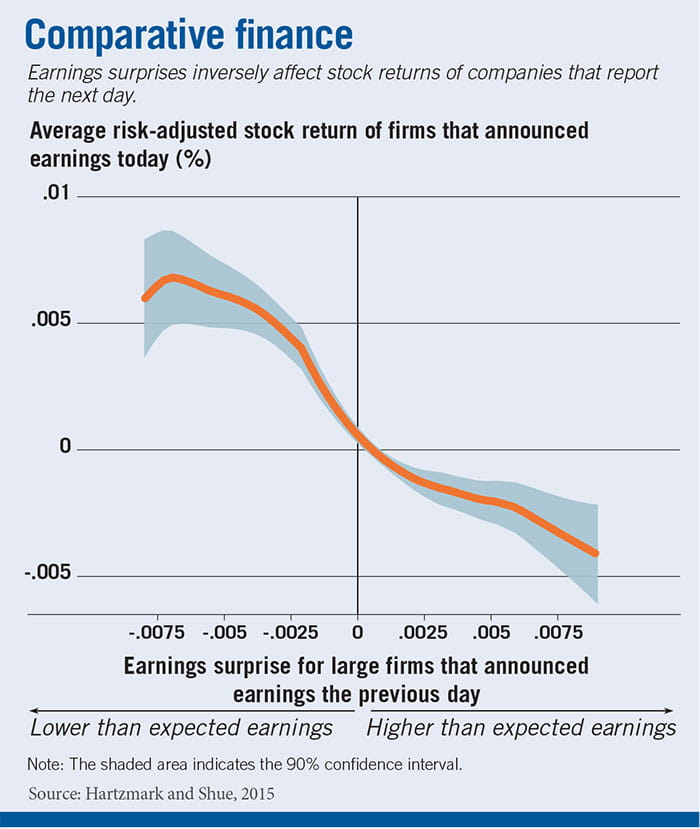

In [140]:
from IPython.display import Image
from IPython.display import display

# Path to your image file
image_path = "average-risk-adjusted-stock-return-company-earnings-chart.jpeg"

# Display the image
#display(Image(filename=image_path))
print('\n')

display(Image(filename=image_path, width=600)) #, height=400))  # Adjust width and height as needed

print('\n')

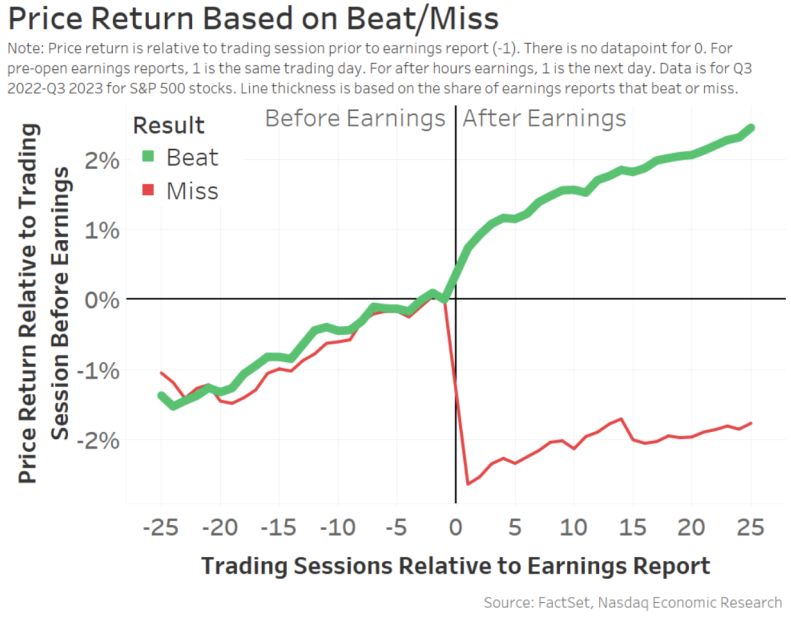

In [132]:
from IPython.display import Image
from IPython.display import display

# Path to your image file
image_path = "Earnings News.png"

# Display the image
#display(Image(filename=image_path))
print('\n')

display(Image(filename=image_path, width=600)) #, height=400))  # Adjust width and height as needed

print('\n')

# Important Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)  
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)